# **lithomap**

## 2D geometry layout for lithography masks

A 2D geometry layout and visualization framework for creating lithography masks, with the ability to create wafer and chip maps for an easy-to-reference layout of the litho structures. The map can be thought of as a cartoon version to illustrate the shapes, dimensions, and annotations of the mask layout in a more comprehensible way.

add example
<!-- ## Example -->

<!-- Show actual chip layout vs chip map -->

### Elements

The basic building block is an **Element** which can contain various shapes.

In [1]:
import matplotlib
import numpy as np
from lithomap import *
e = Element(name='shapes',layer='MASK')
e.addrect(x0=100,y0=0,dx=200,dy=100)
e.addcenteredrect(x0=500,y0=0,dx=200,dy=100)
e.addcircle(x0=0,y0=100,r=25)
polygon = [(0,0),(40,0),(0,40),(0,0)]
e.addpoly(polygon)
xs,ys = [0,-40,0],[-20,-20,-60]
e.addxypoly(xs,ys,autoclose=True)
e.plot();

ModuleNotFoundError: No module named 'waves'

Various operations are available such a translating and scaling. Methods can be chained.

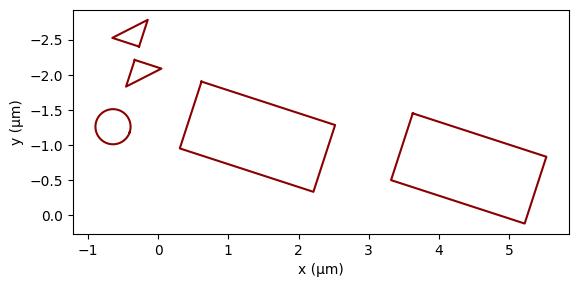

In [ ]:
e.translate(-100,-200).scale(0.01).rotate(np.pi/10)
e.plot();

Elements can also contain **Notes**, which are the building blocks for creating annotated wafer maps and chip maps. (Notes are added to a separate NOTES layer.)

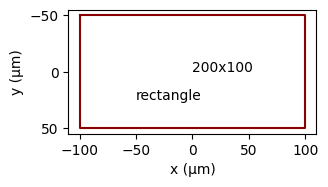

In [ ]:
ee = Element(name='shapes',layer='MASK')
ee.addcenteredrect(x0=0,y0=0,dx=200,dy=100)
ee.addnote(x=0,y=0,note='200x100')
ee.addnote(x=-50,y=25,note='rectangle')
ee.plot(scale=0.5);

Elements can have subelements, all of which are typically belong to a single parent mask element. Subelements can futher have subelements of their own. The root element must have a layer defined, typically 'MASK'; subelements will by default have the same layer. It is recommended to always name new elements.

Dec99mask maskname:Dec99mask
	►glasses 
		►L 
		►R 


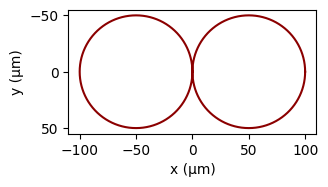

In [ ]:
mask0 = Element(name='Dec99mask',layer='MASK')
eyeglasses = Element(parent=mask0,name='glasses')
eyeL = Element(parent=eyeglasses,name='L').addcircle(x0=-50,y0=0,r=50)
eyeR = Element(parent=eyeglasses,name='R').addcircle(x0=+50,y0=0,r=50)
print(mask0)
mask0.plot(scale=0.5);

Text elements can also be added. Note how the letters 'e' and 'o' are formed and how text must be inset. Shapes that are contained inside of other shapes are not allowed.

Dec99mask maskname:Dec99mask,text: 123 Hello
	►text 
	►text2 


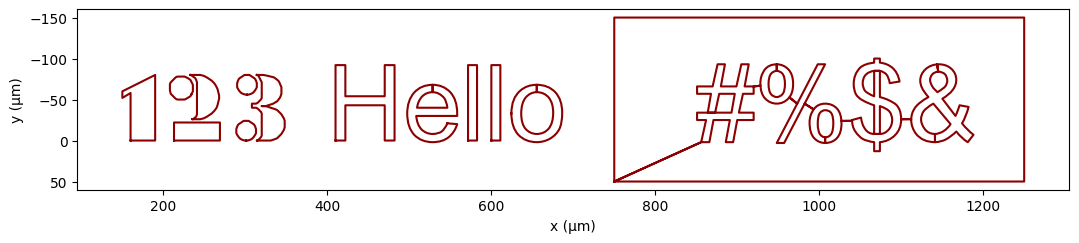

In [ ]:
mask1 = Element(name='Dec99mask',layer='MASK')
mask1.addtext('123',x=150,y=0)
mask1.addtext('Hello',x=400,y=0,font='c:/Windows/Fonts/arial.ttf')
box = [(750+500*x,50-200*y) for x,y in zip([0,1,1,0,0],[0,0,1,1,0])]
mask1.addinsettext(polylist=[box],s='#%$&',x0=850,y0=0,font='c:/Windows/Fonts/arial.ttf')
print(mask1)
mask1.plot(scale=2);

### Building a chip

A **Chip** is an element that has an extra feature to keep track of chip number

In [ ]:
mask1 = Element(name='mask1',layer='MASK')
a = Chip(parent=mask1)
b = Chip(parent=mask1)
print(a.info.chipid)
print(b.info.chipid)
print('chipcount:',mask1.info.chipcount);

01A
02A
chipcount: 2


Information can be specified for an element using it's **info** attribute. It is a python dictionary that can be accessed via 'dot notation'. Subelements can then use this for 'default' values. For instance, a default chip width and length can be specified for the whole mask, and width and length do not have to be specified for each chip individually. A method such as **adddiceguides()** will then look for a default value of **chipwidth** and **chiplength** if not explicitly specified and use those values for drawing the dice guide dimensions.

When the mask is rendered values in the info attribute for all elements and subelements will be saved in text format for permanent reference, so be liberal in adding any information that may be useful at a later date.

chiplength:5000,chipwidth:500,font:c:/Windows/Fonts/arial.ttf,maskname:mask2,minfeature:1.0


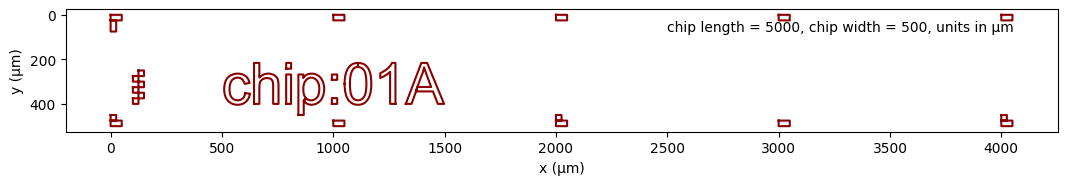

In [ ]:
mask2 = Element(name='mask2',layer='MASK')
mask2.info.font = 'c:/Windows/Fonts/arial.ttf'
mask2.info.minfeature = 1.0
mask2.info.chiplength = 5000
mask2.info.chipwidth = 500
print(mask2.info)
chip = Chip(parent=mask2)
chip.adddiceguides()
chip.addmetric(x=100,y=400,dx=25,dy=25,nx=2,ny=6)
chip.addtext('chip:'+chip.info.chipid,x=500,y=400,scale=2)
chip.addscalenote(poling=False);
chip.plot(scale=2);

chiplength:5000,chipwidth:500,font:c:/Windows/Fonts/arial.ttf,maskname:mask2,minfeature:1.0


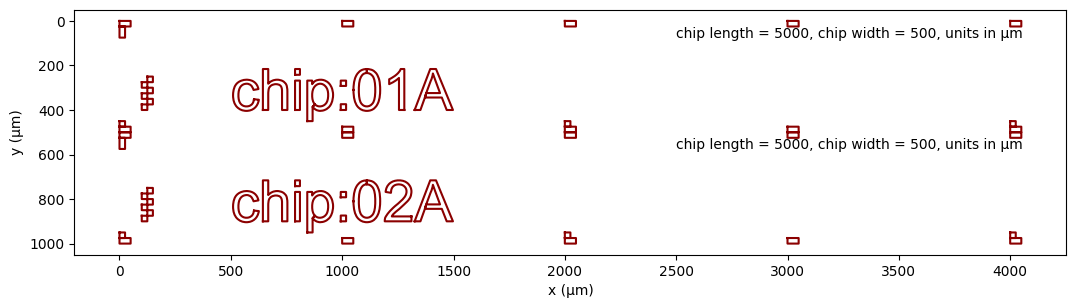

In [ ]:
mask2 = Element(name='mask2',layer='MASK')
mask2.info.font = 'c:/Windows/Fonts/arial.ttf'
mask2.info.minfeature = 1.0
mask2.info.chiplength = 5000
mask2.info.chipwidth = 500
print(mask2.info)
def addchip(mask,x,y):
    chip = Chip(parent=mask2)
    chip.adddiceguides()
    chip.addmetric(x=100,y=400,dx=25,dy=25,nx=2,ny=6)
    chip.addtext('chip:'+chip.info.chipid,x=500,y=400,scale=2)
    chip.addscalenote(poling=False)
    chip.translate(x,y)
addchip(mask2,0,0)
addchip(mask2,0,500)
mask2.plot(scale=2);

Some common **info** attributes:

In [ ]:
mask = Element(layer='MASK')
mask.info.minfeature = 1.0
mask.info.font = 'arial.ttf'
mask.info.chiplength = 55000
mask.info.chipwidth = 2000
mask.info.rows = 20
mask.info.columns = 4
mask.info.dicegap = 750
mask.info.chipcount = 0
mask.info.maskname
chip.info.chipid
chip.info.vgroovepitch = 127
chip.info.sbendlength = 2400
chip.info.modefilterlength = 3000
chip.info.taperlength = 2500

### Guide and Group

A waveguide is typically added to a Group (group of waveguides) which will automate keeping track of how many waveguide groups there, the number of waveguides in each group. Waveguides in the first Group are named 'G1.1', 'G1.2', etc. In the second group they are named 'G2.1', 'G2.2', etc and so on. 

The spacing between groups and the waveguides in a group can also be automated by setting **chip.info.groupspacing** and  **chip.info.guidespacing** for the **chip** that contains the Groups. The position of Group or Guide is determined by the current value of **chip.y** which is incremented appropriately each time a new Group or Guide is added.

Groups will be named 'group', 'group2', 'group3', ... if not given a name explicitly. (Similarly for Guides.) 

On-mask labeling of a Group (including metrics, longitudinal position, chip id, and guide name) can be added by calling **addguidelabels()**.

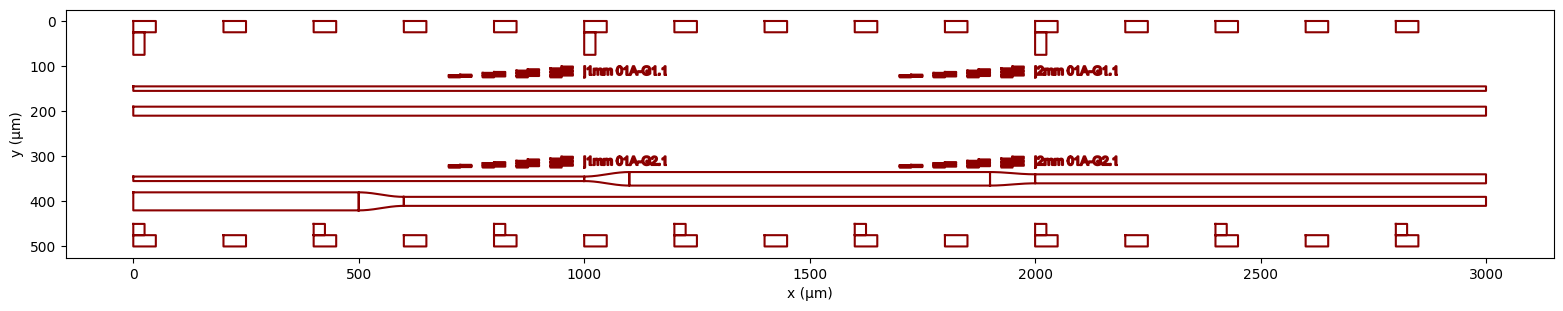

In [ ]:
mask3 = Element(name='mask3',layer='MASK')
mask3.info.font = 'c:/Windows/Fonts/arial.ttf'
mask3.info.chiplength = 3000
mask3.info.chipwidth = 500
mask3.info.minfeature = 10.0
chip = Chip(parent=mask3)
chip.info.groupspacing = 150
chip.info.guidespacing = 50
chip.adddiceguides(repx=200)
chip.y = 150
g1 = Group(parent=chip).addguidelabels(dy=-25,repx=1000)
g1.addchannel(10)
g1.addchannel(20)
g2 = Group(parent=chip).addguidelabels(dy=-25,repx=1000)
g2.addmodefilter(30,inwidth=10,outwidth=20,modefilterx=1000,taperx=100)
g2.addmodefilter(20,inwidth=40,outwidth=0,modefilterx=500,taperx=100)
chip.plot(scale=3,notes=False);

### Building a waveguide

A **Guide** can be built up in pieces in an automated manner. A particular guide **wg** internally uses **wg.x** and **wg.y** to keep track of the end of the waveguide, to determine where the next piece should be added on, and **wg.width** to specify the current width of the guide.

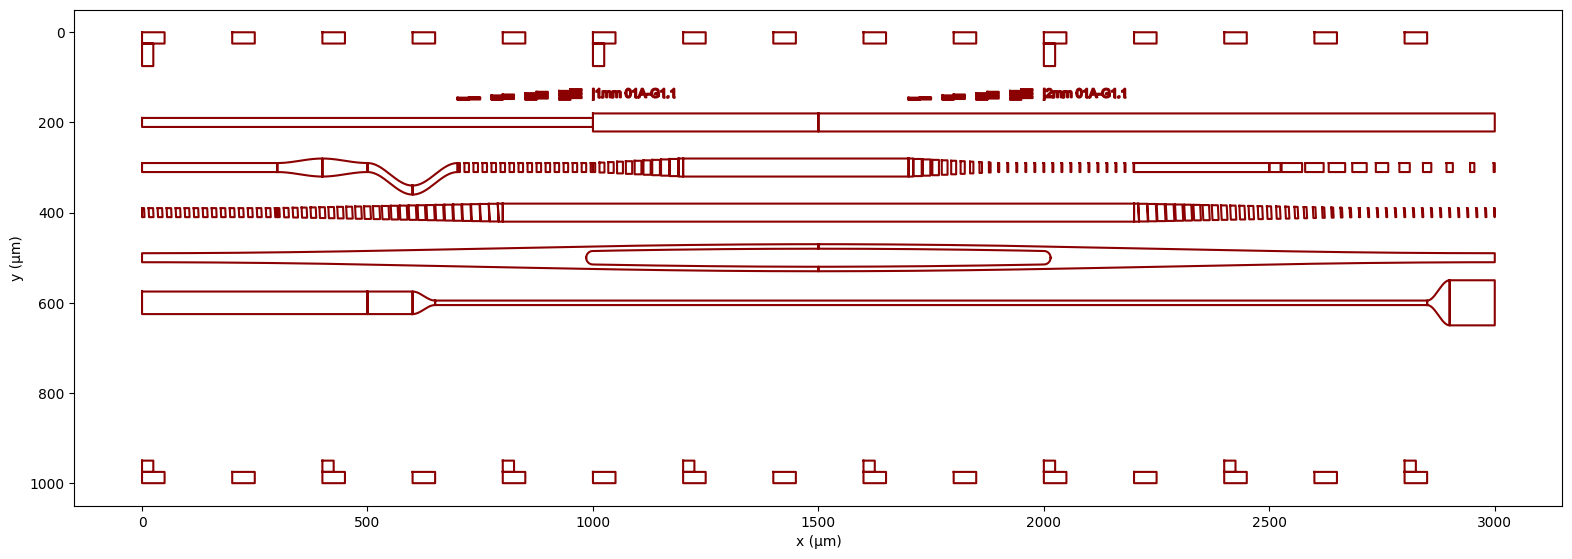

In [13]:
mask4 = Element(name='mask4',layer='MASK')
mask4.info.font = 'c:/Windows/Fonts/arial.ttf'
mask4.info.chiplength = 3000
mask4.info.chipwidth = 1000
mask4.info.minfeature = 10.0
chip = Chip(parent=mask4)
chip.info.groupspacing = 200
chip.info.guidespacing = 100
chip.adddiceguides(repx=200)
chip.y = 200
g = Group(parent=chip).addguidelabels(dy=-50,repx=1000)

wg1 = Guide(parent=g)
wg1.width = 20
wg1.addonchannel(dx=1000).addonchannel(width=40,dx=500).addonchannel(dx=1500)

wg2 = Guide(parent=g)
wg2.addonchannel(width=20,dx=300)
wg2.addontaper(outwidth=40,dx=100).addontaper(outwidth=20,dx=100)
wg2.addonsbend(dx=100,dy=50).addonsbend(dx=100,dy=-50)
wg2.addontaperedbraggmodefilter(mfwidth=20,width=40,period=20,dx=1500,indc=0.5,outdc=0.1,modefilterx=300,taperx=200)
wg2.addonchannel(dx=300)
wg2.addonbragg(dx=500,period=50,dc=1.0,enddc=0.1,note=False)

wg3 = Guide(parent=g)
wg3.info.braggangle = 0.05
wg3.addontaperedbraggmodefilter(20,40,period=20,dx=3000,indc=0.5,outdc=0.1,modefilterx=300,taperx=500)

wg4 = Guide(parent=g)
wg4.addondoublesbend(dx=1500,dy=50,width=10,poshalf=0,neghalf=0,splitradius=15,outputside=False)
wg4.addondoublesbend(dx=1500,dy=50,width=10,poshalf=0,neghalf=0,splitradius=15,outputside=True)

wg5 = Guide(parent=g,width=50)
wg5.addonchannel(dx=500)
wg5.addonmodefilter(width=10,dx=2500,inwidth=50,outwidth=100,modefilterx=100,taperx=50)

# wg6 = Guide(parent=g,width=50)
# wg6.addonchannel(700)
# wg6.addonsplittapersbend(dx=600,dy=150,taperx=300,sx=400,sy=30,inwidth=50,outwidth=20,reverse=False).addonchannel(400)
# wg6.addonsplittapersbend(dx=600,dy=150,taperx=300,sx=400,sy=30,inwidth=50,outwidth=20,reverse= True).addonchannel(700)

chip.plot(scale=3,notes=False);

### Building a litho mask

### Wafer map

### Chip maps


### Rendering to dxf, svg, png

### Layers

### Poling waveguide mask

### Electrode waveguide mask

### Fiducials and metrics

### Submount mask

notes

<!-- self.x,self.y -->
<!-- That is used sort of like a marker of internal position for the element, think of it like a cursor maybe. It is used to keep track of the current position within the element for example the position of the current waveguide in the group or the current location of the end of the waveguide when building a waveguide. -->

<!-- relative vs absolute coordinates? -->

<!-- we make a separate dxf file for each layer to avoid any ambiguity. This is done by calling savedxf.savemask() with both list of layers e.g. [‘MASK’, ’ELECTRODE’] and list of mask names for each layer e.g. [‘Apr22A’,’Apr22B’] (always leaving out ‘NOTES’). -->

<!-- 
When a note is created it is attached to a subelement first, so ee has two new subelements (a and b) each of which has a non-empty notes attribute (a.notes and b.notes)

Here are three different ways to print them:

    print(ee.elems[0].notes)
    print(ee.elems[1].notes)

    print(ee.findsubelem('shapes-note').notes)
    print(ee.findsubelem('shapes-note2').notes)

    for n in ee.subnotes():
        print(n)
 -->
